In [1]:
import pandas as pd
import ast
import pickle
from EmotionAnalysis.DataSchemaExtractionParsing import *
from EmotionAnalysis.DataPreProcessing import *
from EmotionAnalysis.SentSemanticModule import *
from EmotionAnalysis.SentTweetModule import *
from EmotionAnalysis.SentSyntacticModule import *

### Applying Rule-Based Lexicon:
#### Strategy:
* Loading Nava Representation of Tweets
* Loading NRC Lexicon corresponding to the language of the dataset
* Computing Word Level Vectors of Emotional and Polarity Scores 
* Computing Sentence Level Vectors of Emotional and Polarity Scores
* Selecting Dominant Emotion and Polarity for each emotion
* Storing both dominant emotion and polarities and their corresponding score vectors for results aggregation purpose (since we want to aggregate by canton which has a set of tweets)
* Visualizing distribution of results

#### 1. Loading NAVA Representation of Tweets:

In [2]:
###### STEP 1: Loading Data with nava affective representation:
# HERE YOU CAN CHANGE THE NAME OF THE FILE FROM WHICH TO LOAD THE DATA

tweets_df = pd.read_csv('../../Results/Sample Affective Representation.csv')

nava_repr = tweets_df['Nava Representation'] 

# Convert nava_tweets 
nava_tweets = []
for i in range(0, len(nava_repr)):
    result = ast.literal_eval(nava_repr[i])
    nava_tweets.append(result)

#### 2. Loading NRC Lexicon dictionary corresponding to the language of the dataset:

###### NB: 
Please have a look at notebook PrepareLexicon for more details on how this lexicon was prepared

In [3]:
with open('../../NRCLexicon/English/english_lexicon.pickle', 'rb') as handle:
    lexicon_dict = pickle.load(handle)
len(lexicon_dict)

6468

#### 3. Computing Word Level Vectors of Emotional and Polarity Scores:

In [4]:
# Both Emotion Recognition and Sentiment Analysis:
# Each word has a vector of 10 elements where the indices are for the following emotions/sentiments:
# 0: Anger
# 1: Anticipation
# 2: Disgust
# 3: Fear
# 4: Joy
# 5: Negative
# 6: Positive
# 7: Sadness
# 8: Surprise
# 9: Trust
matrix_sentences_lexicon = compute_matrix_sentences_list_lexicon(nava_tweets,lexicon_dict)

In [21]:
matrix_sentences_lexicon[10]

[[0, 1, 0, 0, 1, 0, 1, 0, 1, 1],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [1, 0, 0, 1, 0, 1, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]

#### 4. Computing Tweet Level Vectors of Emotional and Polarity Scores:

In [22]:
# Emotion Recognition
sentence_vectors_lexicon = compute_sentence_emotion_vectors(matrix_sentences_lexicon)
sentence_vectors_lexicon[10]

[0.125, 0.25, 0.0, 0.125, 0.125, 0.0, 0.125, 0.125]

In [23]:
# Sentiment Analysis
sentence_vectors_sent = compute_sentence_sentiment_vectors(matrix_sentences_lexicon)
sentence_vectors_sent[10]

[0.125, 0.125]

#### 5. Selecting Dominant Emotion and Polarity for each tweet:

In [10]:
emotionalities = compute_emotionalities(sentence_vectors_lexicon)

emo_dict = {
    0: 'Anger',
    1: 'Anticipation',
    2: 'Disgust',
    3: 'Fear',
    4: 'Joy',
    5: 'Sadness',
    6: 'Surprise',
    7: 'Trust',
    8: 'Neutral'
}

In [11]:
sentiments = compute_sentiments(sentence_vectors_sent,emotionalities)

sent_dict = {
    0: "Negative",
    1: "Positive",
    2: "Neutral"
}

In [12]:
emotions = []
senti = []
for i in range(0,len(emotionalities)):
    emotions.append(emo_dict[emotionalities[i]])
    senti.append(sent_dict[sentiments[i]])

#### 6. Storing both dominant emotion and polarities and their corresponding score vectors for results aggregation purpose (since we want to aggregate by canton which has a set of tweets):

In [13]:
tweets_df['Emotion'] = emotions

tweets_df['Emotion Vectors'] = sentence_vectors_lexicon

tweets_df['Sentiment'] = senti

tweets_df['Sentiment Vectors'] = sentence_vectors_sent

In [14]:
tweets_df.to_csv('../../Results/RuleBasedLexiconResultsSampleEnglishData.csv',encoding ="utf-8",index=False)

#### 7. Visualizing distribution of results:

#### 7.1. Visualizing Emotion Results:

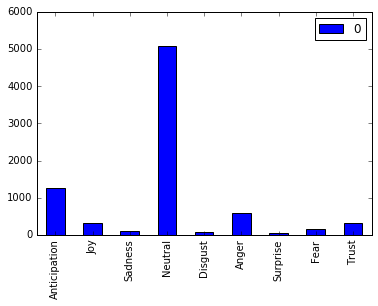

In [16]:
%matplotlib inline
from collections import Counter
frequency = Counter(tweets_df['Emotion'])
df = pd.DataFrame.from_dict(frequency, orient='index')
df.plot(kind='bar')

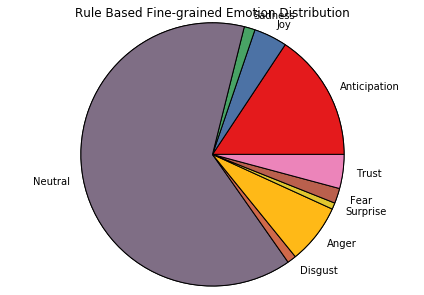

In [17]:
import numpy as np
from matplotlib import cm
import matplotlib.pyplot as plt
a=np.random.random(9)
cs=cm.Set1(np.arange(9)/9.)
f=plt.figure()
ax=f.add_subplot(111, aspect='equal')
patches, texts = plt.pie(df, colors=cs, startangle=90)
labels = df.index
p=plt.pie(df, colors=cs, labels = labels)
plt.axis('equal')
plt.tight_layout()
plt.title("Rule Based Fine-grained Emotion Distribution")
plt.show()

#### 7.2. Visualizing Sentiment Results

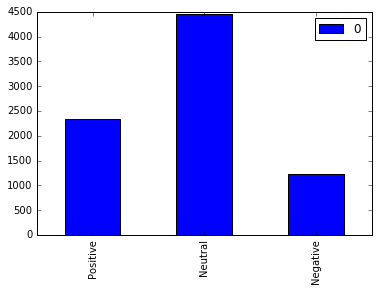

In [18]:
%matplotlib inline
from collections import Counter
frequency = Counter(tweets_df['Sentiment'])
df = pd.DataFrame.from_dict(frequency, orient='index')
df.plot(kind='bar')

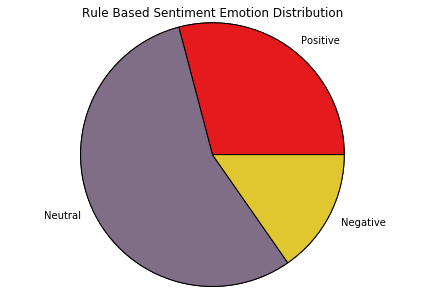

In [20]:
import numpy as np
from matplotlib import cm
import matplotlib.pyplot as plt
a=np.random.random(3)
cs=cm.Set1(np.arange(3)/3.)
f=plt.figure()
ax=f.add_subplot(111, aspect='equal')
patches, texts = plt.pie(df, colors=cs, startangle=90)
labels = df.index
p=plt.pie(df, colors=cs, labels = labels)
plt.axis('equal')
plt.tight_layout()
plt.title("Rule Based Sentiment Emotion Distribution")
plt.show()